# Problem Statement

> In the highly competitive telecom industry, on an average 15-25%, active customer annually switches from one operator to another. And to acquiring new customers costs more than retaining the active customer. Therefore, to retain customer, specially high profitable customer is the main goal of a telecom operator. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

-----

> **Few keypoint to note:**
>- Given data is based on the Indian and Southeast Asian market where customers pay a monthly/annual bill after using the services(Postpaid). 
>- In this kernel, the usage-based definition is used to define churn means customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
>- Churn is predicted only on high-value customers based on certain metric.

-----

> **Business Objective:**
>- The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
>- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.


## Import and Inspect Data

In [1]:
# Import useful libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [2]:
# Environment variables setting

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Display maximum specific rows and columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 500)

In [3]:
# Import Dataset
tele = pd.read_csv('telecom_churn_data.csv')
tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Initial information of dataframe
print(tele.shape)
print(tele.info())

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [5]:
# DataFrame discription
tele.describe() 

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

---
-  Get a DataFrame containing the data type objects and number of unique elements of each column of Dataframe. Here, index of DataFrame is column name.

In [6]:
df_type_unique = pd.concat([tele.dtypes, tele.nunique()], axis=1)
df_type_unique.columns = ['data_type', 'unique_value']
print("DataFrame combining two series:")
df_type_unique 

DataFrame combining two series:


,data_type,unique_value
mobile_number,int64,99999
circle_id,int64,1
loc_og_t2o_mou,float64,1
std_og_t2o_mou,float64,1
loc_ic_t2o_mou,float64,1
last_date_of_month_6,object,1
last_date_of_month_7,object,1
last_date_of_month_8,object,1
last_date_of_month_9,object,1
arpu_6,float64,85681


> - Dataframe contain `mobile_number` unique ID and `circle_id` common ID. <br>
> - Few columns having only one unique value e.g `std_og_t2c_mou_[6,7,8,9]`. <br>
> - Categorical fetures `night_pck_user_[6,7,8,9]` and `fb_user_[6,7,8,9]` has categorical binary value.
---

In [7]:
# Converting Datatype of unique ID into object
tele['mobile_number'] = tele['mobile_number'].astype('object') 

## Data Cleaning and Imputation

- User defined function which is used throughout this notebook. 

In [8]:
# To get missing values DataFrame
def missing_val(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = round(total/data.shape[0]*100, 2)
    return pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])

# To get value counts DataFrame
def count_val(data, feature):
    total = data.loc[:, feature].value_counts(dropna=False)
    percentage = round(data.loc[:, feature].value_counts(
        dropna=False, normalize=True)*100, 2)
    return pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])

---
- Identify and drop columns which is not useful for model building 

In [9]:
# Making a list of columns to drop
col2drop = []

# All customer belongs to one telecome circle, so we will also consider it to drop.
col2drop.append('circle_id')

# There are few columns having all zero or missing values, which will not be usefull for model building
#zerosum_col = list((tele.sum(axis=0) == 0).index[tele.sum(axis=0) == 0])
zerosum_col = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
               'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9',
               'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

print('Columns having all zero or missing values: ')
print('-------------------------------------------')
print(zerosum_col)

# Concate lists
col2drop = col2drop + zerosum_col

# Drop columns
tele.drop(col2drop, inplace=True, axis=1)

Columns having all zero or missing values: 
-------------------------------------------
['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


---
- Missing values

In [10]:
# Getting dataframe of missing values by percentage. 
missing_val(tele)

,Total,Percentage
total_rech_data_6,74846,74.85
arpu_3g_6,74846,74.85
av_rech_amt_data_6,74846,74.85
date_of_last_rech_data_6,74846,74.85
night_pck_user_6,74846,74.85
arpu_2g_6,74846,74.85
fb_user_6,74846,74.85
count_rech_2g_6,74846,74.85
count_rech_3g_6,74846,74.85
max_rech_data_6,74846,74.85


> All the columns having more than 70% missing values are related to Internet data or mobile data recharge.
---

- Handling mobile internet columns

In [11]:
# Observing one month(August) of internet related columns where missing percentage are more than 70%
# With 'date_of_last_rech_data_8'
tele[['date_of_last_rech_data_8', 'arpu_2g_8', 'arpu_3g_8', 'total_rech_data_8', 'count_rech_2g_8',
      'count_rech_3g_8', 'av_rech_amt_data_8', 'max_rech_data_8', 'fb_user_8', 'night_pck_user_8']].head(10)

,date_of_last_rech_data_8,arpu_2g_8,arpu_3g_8,total_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,max_rech_data_8,fb_user_8,night_pck_user_8
0,8/8/2014,212.17,212.17,1.0,0.0,1.0,252.0,252.0,1.0,0.0
1,8/10/2014,7.60,0.00,2.0,2.0,0.0,50.0,25.0,1.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8/23/2014,0.00,19.83,3.0,3.0,0.0,69.0,23.0,1.0,0.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> - By looking at one month of above data, we can say that the customers having missing values has actually not recharge the data in that particular month and the same pattern can be seen in all four month of data.
> - These all can be interpreted as meaningful missing values, which means customer has not used that service.
> - So the columns where missing percentage are higher than 70% can be imputed with 0 except Date columns.
---

- Imputing meaningful columns

In [12]:
# List of meaningfull columns where missing values can be imputed with 0
date_of_last_rech_data_col = ['date_of_last_rech_data_6','date_of_last_rech_data_7',
                              'date_of_last_rech_data_8','date_of_last_rech_data_9']

col2fill_0 = list(set(missing_val(tele).index[missing_val(tele)['Percentage'] > 70]) - set(date_of_last_rech_data_col))

# Fill 0 where the columns have missing value
tele[col2fill_0] = tele[col2fill_0].fillna(0)

# Check missing value
missing_val(tele)

,Total,Percentage
date_of_last_rech_data_6,74846,74.85
date_of_last_rech_data_7,74428,74.43
date_of_last_rech_data_9,74077,74.08
date_of_last_rech_data_8,73660,73.66
loc_ic_t2f_mou_9,7745,7.75
std_og_t2m_mou_9,7745,7.75
std_ic_t2m_mou_9,7745,7.75
loc_og_mou_9,7745,7.75
loc_og_t2t_mou_9,7745,7.75
isd_ic_mou_9,7745,7.75


> - Remaining all columns with missing values are related to incoming and outgoing voice call in terms of minutes of usage, except Date columns.
> - It can be stated, e.g missing 3.62% of `date_of_last_rech_8` is differing to the missing 5.38% of other August columns. It means few customers may have recharged the service but usage data is missing.
> - Customer having a `date_of_last_rech_8` as missing can be imputed with 0, and others by mean or median.
> - Above mention inference is applicable to the all available 4 months. Here, August is taken as example only.

---

- Handling Voice call columns

In [13]:
# Creating col list variables associate with respective months.
d = {}
for x in range(6, 10):
    d["mou_col_{0}".format(x)] = list(set(tele.columns[tele.columns.str.contains('mou_{0}|others_{0}'.format(x))])-set(['total_ic_mou_{0}'.format(x), 'total_og_mou_{0}'.format(x)]))

# Convert dictionary entries into variables
for key,val in d.items():
        exec(key + '=val')

print('This code generates e.g Voice call related list of columns of August:')
print('-----------------------------------------------------------------------')
print(mou_col_8)

This code generates e.g Voice call related list of columns of August:
-----------------------------------------------------------------------
['std_ic_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_ic_mou_8', 'loc_ic_t2m_mou_8', 'onnet_mou_8', 'isd_og_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'loc_ic_t2f_mou_8', 'roam_og_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2f_mou_8', 'og_others_8', 'std_og_t2t_mou_8', 'offnet_mou_8', 'loc_ic_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'std_ic_t2m_mou_8', 'spl_og_mou_8', 'std_og_t2f_mou_8', 'isd_ic_mou_8', 'roam_ic_mou_8']


- Imputing 0 to the voice call related columns where `date_of_last_rech` is missing for particular month.

In [14]:
# Iteration through all months
for i in range(6,10):
    tele.loc[tele['date_of_last_rech_{0}'.format(i)].isnull(),d['mou_col_{0}'.format(i)]] = tele[tele['date_of_last_rech_{0}'.format(i)].isnull()][d['mou_col_{0}'.format(i)]].fillna(0)
    

In [15]:
missing_val(tele)

,Total,Percentage
date_of_last_rech_data_6,74846,74.85
date_of_last_rech_data_7,74428,74.43
date_of_last_rech_data_9,74077,74.08
date_of_last_rech_data_8,73660,73.66
std_ic_t2f_mou_9,4858,4.86
std_og_t2f_mou_9,4858,4.86
std_ic_t2m_mou_9,4858,4.86
loc_og_t2m_mou_9,4858,4.86
loc_og_t2f_mou_9,4858,4.86
loc_og_t2c_mou_9,4858,4.86


> - Remaining missing values can be imputed for particular type of call by taking average of the all months available data.
> - For example, `['std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9']` will be filled by mean value of four month of usage if any value is missing.

In [16]:
# List of types of call
mou_type = ['std_ic_t2f_mou', 'isd_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_mou',
            'offnet_mou', 'std_ic_t2t_mou', 'spl_ic_mou', 'loc_og_mou', 'og_others', 'ic_others',
            'loc_ic_mou', 'loc_og_t2t_mou', 'roam_ic_mou', 'loc_og_t2m_mou', 'loc_ic_t2f_mou',
            'std_og_t2f_mou', 'loc_og_t2c_mou', 'spl_og_mou', 'roam_og_mou', 'loc_ic_t2t_mou',
            'std_ic_t2m_mou', 'isd_ic_mou', 'onnet_mou', 'loc_og_t2f_mou', 'std_ic_mou', 'loc_ic_t2m_mou']

# List of all voice call related columns
mou_col = mou_col_6 + mou_col_7 + mou_col_8 + mou_col_9

In [17]:
%%time

# Imputing mean value
for i in mou_type:
    
    # getting list by one type of mou for all four months
    temp_list = list(tele.columns[tele.columns.str.contains(i)]) 
    
    # mean imputation
    tele[temp_list]=tele[temp_list].T.fillna(tele[temp_list].mean(axis=1)).T.round(2) 

print('e.g temp_list(last iteration):') 
print(temp_list)

e.g temp_list(last iteration):
['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9']
Wall time: 6min 26s


In [18]:
# Check missing values
missing_val(tele)

,Total,Percentage
date_of_last_rech_data_6,74846,74.85
date_of_last_rech_data_7,74428,74.43
date_of_last_rech_data_9,74077,74.08
date_of_last_rech_data_8,73660,73.66
date_of_last_rech_9,4760,4.76
date_of_last_rech_8,3622,3.62
date_of_last_rech_7,1767,1.77
last_date_of_month_9,1659,1.66
date_of_last_rech_6,1607,1.61
last_date_of_month_8,1100,1.10


> The missing value left other than date columns are those where customer has always recharged but has never made particular type of call. Those values can be imputed with 0.

In [19]:
# Impute zero for meaningful missing values
tele[mou_col] = tele[mou_col].fillna(0)

# Missing value counts
missing_val(tele)[:13]

,Total,Percentage
date_of_last_rech_data_6,74846,74.85
date_of_last_rech_data_7,74428,74.43
date_of_last_rech_data_9,74077,74.08
date_of_last_rech_data_8,73660,73.66
date_of_last_rech_9,4760,4.76
date_of_last_rech_8,3622,3.62
date_of_last_rech_7,1767,1.77
last_date_of_month_9,1659,1.66
date_of_last_rech_6,1607,1.61
last_date_of_month_8,1100,1.10


> Only the Date columns left with missing value. 
---

- Handling Date time columns
 - Rather than dropping the datetime columns, it can be useful to derive new feature. 
 - We are going to build model only on June-August months considering September as churn phase, so we will exclude 9th month data to derive any new features.

In [20]:
# Customers have never recharge any amount.
never_rech = tele[['date_of_last_rech_6', 'date_of_last_rech_7', 
                   'date_of_last_rech_8']].isnull().all(axis=1).sum()

print('Number of customers have never recharge any amount: {0}'.format(never_rech))

# Customers have never recharge any data.
never_rech_data = tele[['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
                 'date_of_last_rech_data_8']].isnull().all(axis=1).sum()

print('Number of customers have never recharge any data: {0}'.format(never_rech_data))

Number of customers have never recharge any amount: 99
Number of customers have never recharge any data: 62614


> Almost all customers have made atleast one normal recharge from June to Aug, but ~62.5% customers have never subscribed to any data pack.
---

- We can create a binary feature stating whether the customer has ever used internet data service or not.
  - if never recharge any data, then new column `ever_rech_data` = 0, else 1

In [21]:
# Initially set all the values as 1
tele['ever_rech_data'] = 1

# Set 0 to the customer who has never recharged any data for the month 6,7 and 8
tele.loc[tele[['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
               'date_of_last_rech_data_8']].isnull().all(axis=1), 'ever_rech_data'] = 0

# Inspect new feature
tele[['ever_rech_data', 'date_of_last_rech_data_6',
      'date_of_last_rech_data_7', 'date_of_last_rech_data_8']].head()

,ever_rech_data,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,1,6/21/2014,7/16/2014,8/8/2014
1,1,NaN,7/25/2014,8/10/2014
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,1,6/4/2014,NaN,NaN


In [22]:
# Dropping date columns
datecol2drop = list(tele.columns[tele.columns.str.contains('date')])
tele.drop(datecol2drop, axis=1, inplace=True)

In [23]:
# Missing value counts
missing_val(tele)[:5]

,Total,Percentage
ever_rech_data,0,0.0
spl_og_mou_8,0,0.0
loc_ic_t2t_mou_6,0,0.0
total_og_mou_9,0,0.0
total_og_mou_8,0,0.0


## Data Filter and Churn Variable

---
- Filtering high value customer. 
- By considering June and July month as good phase of customer relation, `total_rech_amt_[6,7]` is already given but total recharge amount of data can be derived by multiplying `total_rech_data_[6,7]` with `av_rech_amt_data_[6,7]`.

In [24]:
# Derive total recharge amount features for the month of June and July
total_rech_amt_data_6 = (tele['total_rech_data_6'] * tele['av_rech_amt_data_6']) + tele['total_rech_amt_6']
total_rech_amt_data_7 = (tele['total_rech_data_7'] * tele['av_rech_amt_data_7']) + tele['total_rech_amt_7']

# Get an average of total recharge amount of 6 and 7 month
tele['av_total_rech_amt_67'] = (total_rech_amt_data_6 + total_rech_amt_data_7)/2

# 70% percentile
tele['av_total_rech_amt_67'].quantile(0.7)

478.0

In [25]:
# Filter top 30% customer
tele = tele[tele['av_total_rech_amt_67'] > tele['av_total_rech_amt_67'].quantile(0.7)]
tele.shape

(29953, 204)

- churn label using september data
 - If customer has not attempted any incoming or outgoing call and used 0 MB 2g/3g data, then we can say that customer has stopped to use simcard and can be labeled 1(churned) or 0(not churn).

In [26]:
# Initially set all the values as 0
tele['churn'] = 0

# Set 1 to the customer who has never made a call or not used any internet data in September

tele.loc[tele[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 'churn'] = 1

# Churn value counts
print(count_val(tele,'churn'))

# Inspect head 
tele[['mobile_number','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head()

   Total  Percentage
0  27520       91.88
1   2433        8.12


,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,7000842753,0.00,0.00,0.00,0.00,1
7,7000701601,0.00,0.00,0.00,0.00,1
8,7001524846,34.91,142.18,0.00,0.00,0
21,7002124215,252.61,1031.53,0.00,0.00,0
23,7000887461,127.48,127.63,13.93,314.74,0


In [27]:
# Drop September month data
sep_col = list(tele.columns[tele.columns.str.contains('9|sep')])
tele.drop(sep_col, inplace = True, axis=1)
tele.shape

(29953, 155)

In [28]:
# High value customer without any missing value
telecom = tele.copy() 


**Here `telecom` DataFrame contain high value customer data from June to August without any missing values.** 

## Exploratory Data Analysis

In [29]:
# Describe DataFrame
telecom.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,ever_rech_data,av_total_rech_amt_67,churn
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0000

- **Target Variable** >

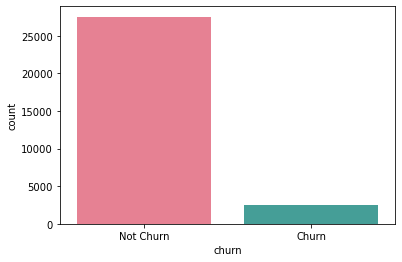

In [30]:
# Visualize the target variable
graph = sns.countplot(telecom['churn'], palette="husl")
graph.set_xticklabels(['Not Churn','Churn'])
plt.show()

> Target variable is highly imbalanced, which should to be consider during model building
---

- **arpu**>

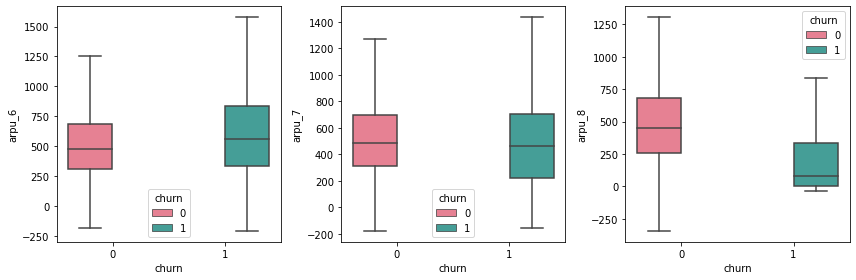

In [31]:
# Ploting average revenue per user
col2plot = ['arpu_6','arpu_7','arpu_8']

plt.figure(figsize=(12, 4))
for i, j in enumerate(col2plot,1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='churn', y= j, data=telecom, hue='churn', showfliers=False, palette='husl')
plt.tight_layout()

> Mean of ARPU is decreasing from June to August who has churned in September
---

- **Total normal recharge amount and Recharge data amount**

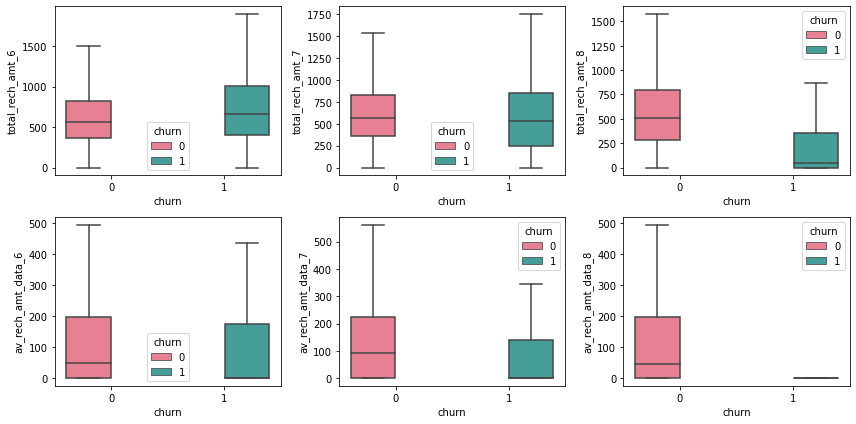

In [32]:
col2plot = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
            'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
plt.figure(figsize=(12, 6))

for i, j in enumerate(col2plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='churn', y=j, data=telecom, hue='churn',
                showfliers=False, palette='husl')
plt.tight_layout()

> Above graph shows average amount recharged for voice call and data drastically decreased in August
---

<Figure size 864x864 with 0 Axes>

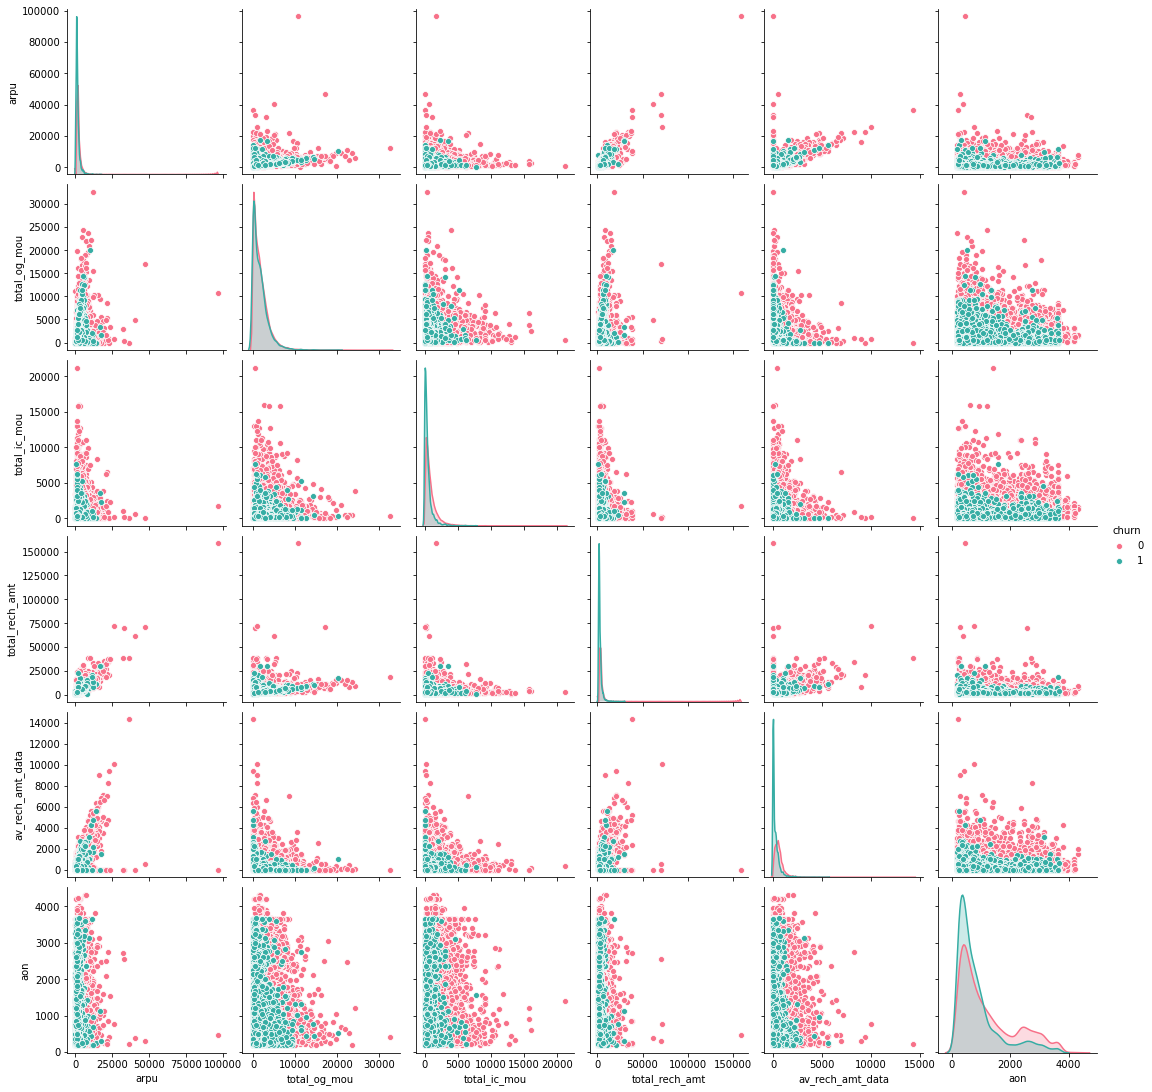

In [33]:
# Pair plot to see corelative trend
col2pair = ['arpu','total_og_mou','total_ic_mou','total_rech_amt','av_rech_amt_data','aon']
df_pairplot = pd.DataFrame()

for i in col2pair:
    temp_list = list(telecom.columns[telecom.columns.str.contains(i)]) 
    df_pairplot[i]=telecom[temp_list].sum(axis=1)

df_pairplot['churn'] = telecom.churn

plt.figure(figsize=(12, 12))
sns.pairplot(df_pairplot, hue ='churn', palette='husl')
plt.show()

> New customers with low ARPU, less outgoing and incoming in last three months are most likely to churn.
> It can be observed that data is highly skewed, need to treat outliers 

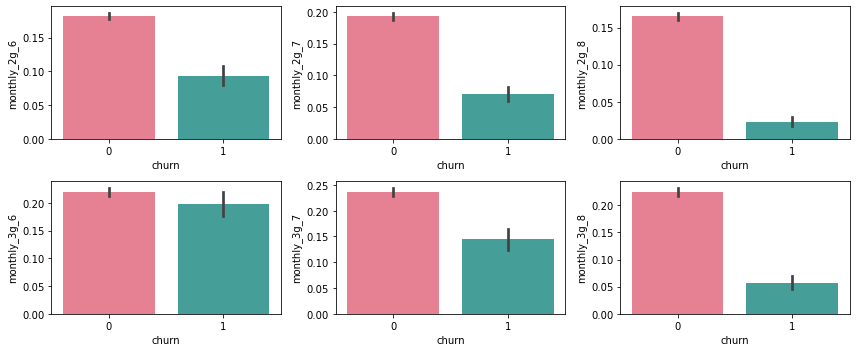

In [34]:
# Monthly internet pack
# Categorical columns
col2bar = ['monthly_2g_6','monthly_2g_7','monthly_2g_8',
           'monthly_3g_6','monthly_3g_7','monthly_3g_8']

plt.figure(figsize=[12, 5])

for i in enumerate(col2bar, 1):
    plt.subplot(2, 3, i[0])
    sns.barplot(telecom['churn'], telecom[i[1]], palette="husl")
plt.tight_layout()

> Use of 2g and 3g was continuously decreased before customer has change their network.

## Data Preperation

- Datatype and dummy variable
 -  All columns are either continuous or discrete numerical variable. Except 'night_pck_user', 'fb_user' and new derived 'ever_rech_data'
 - However, Categorical features have only binary values so no need to create any dummies for those features.

- Checking for Outliers

In [35]:
# Columns at different percentile
telecom.describe(percentiles=[.25, .5, .75, .90, .98, .99 ,.995, .999, .9999])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,ever_rech_data,av_total_rech_amt_67,churn
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0000

- Outliers treatment

In [36]:
# Capping only continuous numerical variable by 0.99 percentile

# Get Coninuous numerical columns
col2cap = list(set(telecom.columns)-set(telecom.columns[telecom.columns.str.contains(
    'monthly_2g|monthly_3g|night_pck_user|sachet|fb|ever_rech_data|churn|mobile_number')]))

for i in col2cap:
    Q = int(telecom[i].quantile([0.99]))
    telecom[i].loc[telecom[i]>=Q] = Q

In [37]:
# Observe the outliers treatment effect
telecom.describe(percentiles=[.90, .98, .99 ,.995, .999, .9999])[-6:-1]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,ever_rech_data,av_total_rech_amt_67,churn
98%,1629.11264,1644.51388,1659.11788,1686.5640,1757.1132,1666.356,1837.9548,1839.9540,1736.8120,213.4512,159.1940,163.8272,350.0652,265.4520,259.0204,621.79,627.9528,574.2624,884.586,866.8772,847.358,58.836,59.308,56.6264,17.478,19.3792,18.73,1362.4020,1326.2264,1292.4068,1458.8708,1510.7816,1441.302,1512.3788,1556.4260,1400.5228,21.9272,20.16,19.0588,2187.0212,2316.2752,2150.4100,11.3240,12.4284,7.5884,46.678,53.5896,49.938,6.48,0.0,0.0,2579.7392,2676.3584,2547.2648,410.17,403.496,388.9596,768.0152,761.7368,756.3868,130.9244,141.2744,125.4772,1130.3212,1123.384,1120.8380,124.9192,132.6752,125.7348,234.5764,245.0844,223.3264,28.8068,29.1592,26.878,356.0772,377.6728,349.678,1348.3252,1388.9100,1339.1920,0.0,0.0,0.0,124.1684,131.0348,121.7204,10.4092,13.8292,11.76,39.0,39.0,37.0,1975.96,2000.00,1957.0,655.0,750.0,619.0,500.0,500.0,479.0,11.0,11.0,11.0,274.0,274.0,252.0,10.0,10.0,10.0,3.0,4.0,4.0,655.0,707.0,683.0,1137.1612,1128.3564,1024.4060,2713.6328,2849.6488,2880.3732,613.9056,625.2008,601.1700,551.558,559.22,525.5976,0.0,0.0,0.0,1.0,2.0,1.0,10.0000,10.0000,10.0000,2.0000,2.0000,2.0000,2.000,3.0000,2.000,1.0,1.0,1.0,3570.96,1461.032,1562.72,1447.8124,1.0,4344.72,1.0
99%,1985.00000,1999.00000,1986.00000,2162.3708,2204.8716,2165.000,2335.5112,2416.2876,2200.2772,345.5736,281.9948,285.8908,532.0000,438.7868,427.9116,1006.00,1019.7816,919.7816,1136.000,1111.7868,1091.000,87.000,87.000,82.0000,24.000,27.0000,28.00,1788.8908,1753.1732,1678.0000,1896.8716,1917.0000,1916.000,1956.0000,2113.9392,1899.7556,39.0000,39.00,35.0000,2757.6308,2871.0848,2779.6532,40.9636,39.0000,31.0000,68.000,75.0000,71.000,8.00,0.0,0.0,3196.5908,3281.4592,3219.0000,632.00,661.000,631.8752,1010.7816,994.9272,985.7348,195.0000,205.0000,184.0000,1474.5216,1508.000,1459.8076,208.0000

In [38]:
# Check columns where 99% values are zero, would become all zero after capping 
print(list(telecom.columns[telecom.sum(axis=0)==0]))

# Drop the columns
telecom.drop(list(telecom.columns[telecom.sum(axis=0)==0]), inplace = True, axis=1)

['og_others_7', 'og_others_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8']


<Figure size 864x864 with 0 Axes>

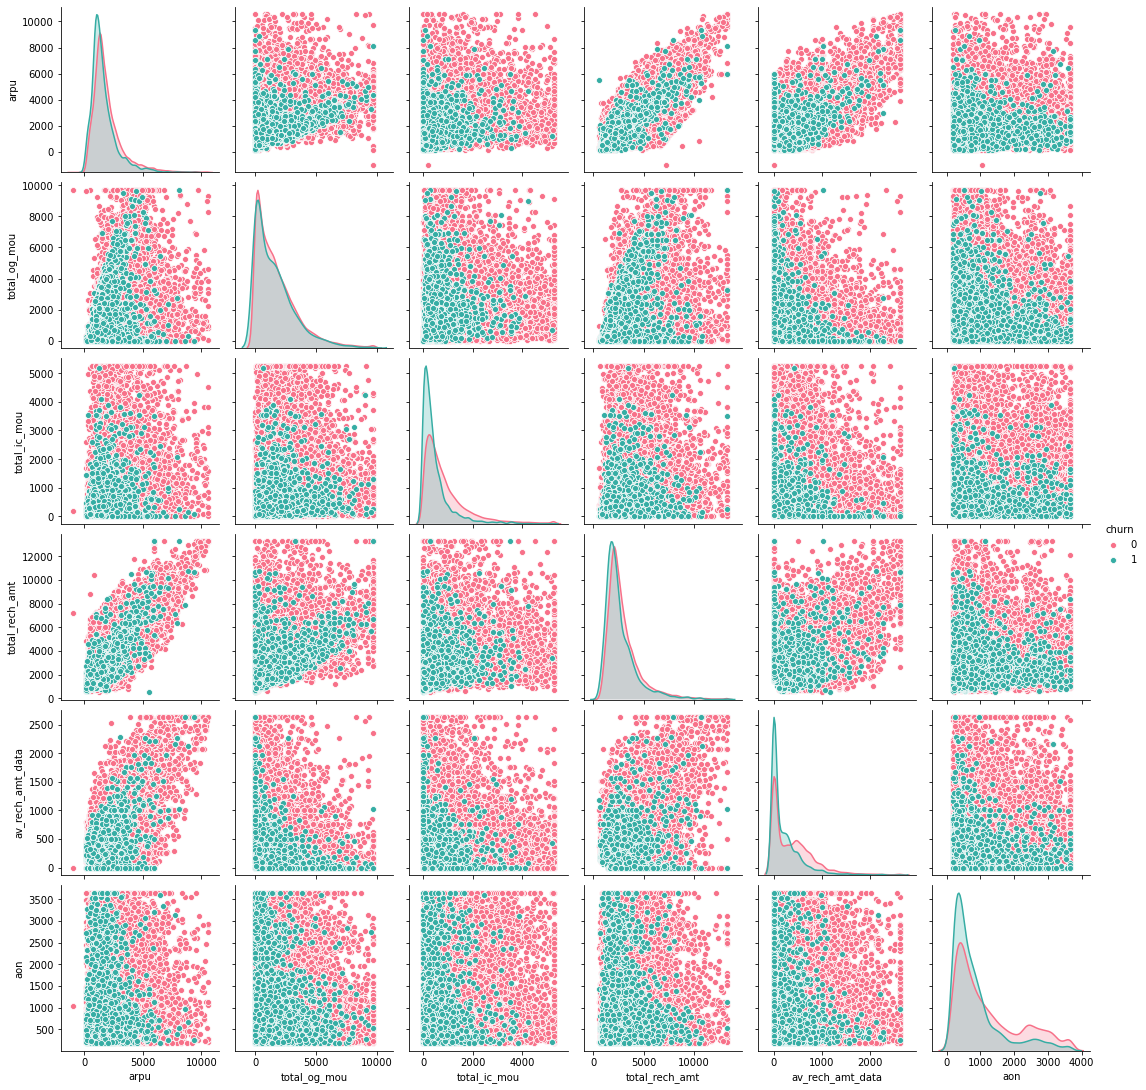

In [39]:
# Let see again few columns which was observed skewed in pairplot
col2pair = ['arpu','total_og_mou','total_ic_mou','total_rech_amt','av_rech_amt_data','aon']
df_pairplot = pd.DataFrame()

for i in col2pair:
    temp_list = list(telecom.columns[telecom.columns.str.contains(i)]) 
    df_pairplot[i]=telecom[temp_list].sum(axis=1)

df_pairplot['churn'] = telecom.churn

plt.figure(figsize=(12, 12))
sns.pairplot(df_pairplot, hue ='churn', palette='husl')
plt.show()

- Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Putting feature variable to X
X = telecom.drop(['churn','mobile_number'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,ever_rech_data,av_total_rech_amt_67
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.16,0.16,0.16,4.13,4.13,4.13,1.15,1.15,1.15,5.44,5.44,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,559.0
7,1069.180,1349.850,1986.000,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,51.0,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,2341,1000,790,951,0,0,565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.

In [42]:
# Putting response variable to y
y = telecom['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

print(round(y_train.sum()/telecom.churn.sum(),2))
print(round(y_test.sum()/telecom.churn.sum(),2))

0.71
0.29


- Feature Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,ever_rech_data,av_total_rech_amt_67
56747,0.598892,0.525098,0.451288,0.009829,0.025390,0.031700,0.100937,0.116719,0.137783,0.153642,0.014007,0.104231,0.136147,0.006173,0.006542,0.017276,0.054343,0.063739,0.123583,0.159164,0.165133,0.003793,0.081954,0.097073,0.000000,0.0,0.000000,0.088379,0.136579,0.147068,0.000000,0.000303,0.004181,0.003395,0.001234,0.003663,0.000000,0.0,0.000000,0.002408,0.001111,0.005387,0.0,0.0,0.0,0.300147,1.000000,1.000000,0.0000,0.057905,0.102197,0.114660,0.121772,0.097489,0.135696,0.297310,0.373729,0.494868,0.046462,0.130049,0.186630,0.262108,0.307016,0.416479,0.000000,0.000000,0.000000,0.121676,0.026179,0.425393,0.000000,0.000000,0.000000,0.080527,0.017247,0.280444,0.304859,0.327059,0.449067,0.433084,0.492203,0.050984,0.0025,0.0000,0.149048,0.255319,0.291667,0.355556,0.180976,0.211697,0.175139,0.120,0.154,0.031546,0.045802,0.045802,0.053097,0.000000,0.071429,0.000000,0.000000,0.338462,0.000000,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.000000,0.169231,0.000000,0.000000,0.003015,0.000000,0.000000,0.091122,0.000000,0.024502,0.059831,0.029884,0.022193,0.016581,0.033174,0.0,0.0,0.0,0.0,0.2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,1.0,0.0,0.235955,0.005051,0.043669,0.000000,1.0,0.012548
64568,0.689536,0.483302,0.416120,0.316195,0.180113,0.169644,0.000098,0.004659,0.005016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000202,0.010126,0.009514,0.000000,0.000000,0.000000,0.000000,0.0,0.023571,0.000129,0.006420,0.006186,0.360342,0.207267,0.191691,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.247980,0.138346,0.132068,0.0,0.0,0.0,0.000000,0.000000,0.009296,0.0000,0.213934,0.124494,0.117530,0.000000,0.000000,0.022437,0.092770,0.025437,0.017688,0.000000,0.000000,0.000000,0.063586,0.016784,0.021664,0.037404,0.114464,0.031157,0.000000,0.000000,0.026545,0.000000,0.000000,0.0

- Correlation

In [45]:
# Find few top most correlated columns
corr_val=0.90
df = telecom.corr().unstack().reset_index()
top_num_cols = list(df[(df[0]>corr_val) & (df[0]<1)]['level_0'].unique())

corr_mat_top = telecom[top_num_cols].corr()

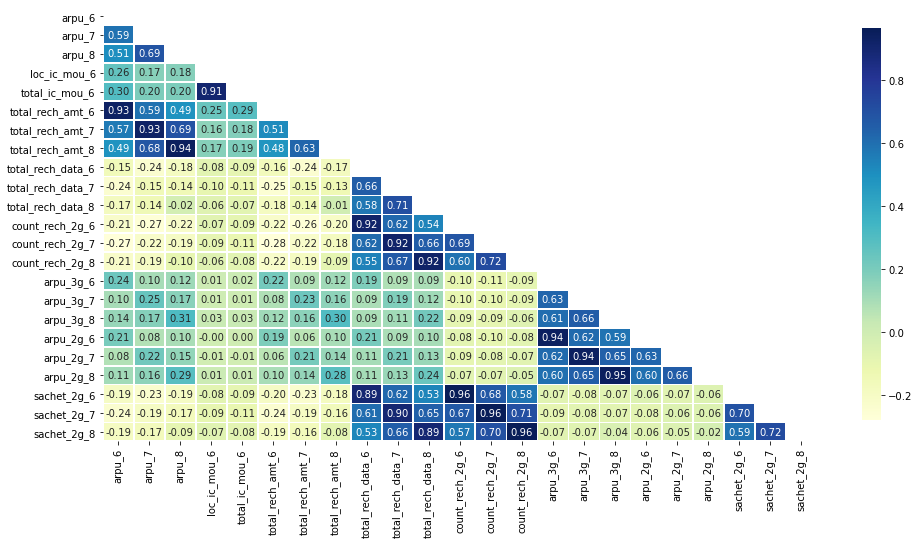

In [46]:
# looking for collinearty
mask = np.triu(np.ones_like(corr_mat_top, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr_mat_top, mask=mask, annot=True,fmt='.2f',cmap="YlGnBu",ax=ax, linewidths=.7, cbar_kws={"shrink": 0.9})
plt.show()

## PCA Model Building

- Train and Test set

In [47]:
print(X_train.shape)
print(X_test.shape)

(20967, 148)
(8986, 148)


- Components from the PCA

In [48]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)
pca.components_

array([[-2.23403033e-02, -2.70303362e-02, -2.15402615e-02, ...,
         7.43905170e-02,  3.43743166e-01,  5.85361949e-02],
       [ 6.64823306e-02,  8.87657881e-02,  1.14860369e-01, ...,
         5.87245035e-02,  1.72329540e-02,  5.40565741e-02],
       [ 5.52734939e-02,  9.01317401e-02,  9.98156422e-02, ...,
         5.89336617e-02,  2.86000247e-02,  1.04142296e-01],
       ...,
       [-4.08077980e-03, -1.73757763e-03,  1.69007996e-03, ...,
        -2.58914829e-03, -3.71082987e-04, -1.90359596e-02],
       [-3.66834270e-03, -2.49684207e-03, -1.14342397e-03, ...,
         1.42296303e-03,  9.86788335e-05, -4.41774805e-03],
       [ 6.27968191e-04, -1.09725976e-03,  1.85278898e-03, ...,
        -1.80712525e-03, -3.72288452e-04, -7.08993406e-03]])

In [49]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([2.36418980e-01, 1.01750680e-01, 6.80316604e-02, 5.73942421e-02,
       3.17321041e-02, 3.05449341e-02, 2.92993141e-02, 2.79351548e-02,
       2.18363537e-02, 2.08444776e-02, 1.78078840e-02, 1.71335744e-02,
       1.61459701e-02, 1.51757486e-02, 1.46480928e-02, 1.33383363e-02,
       1.24590256e-02, 1.17105592e-02, 1.12583003e-02, 1.09859489e-02,
       9.61012819e-03, 9.22499870e-03, 8.75307023e-03, 8.19055479e-03,
       7.95407643e-03, 6.74896016e-03, 6.59788191e-03, 6.20969815e-03,
       6.07736861e-03, 5.99109970e-03, 5.84910799e-03, 5.61079235e-03,
       5.35340485e-03, 5.18358514e-03, 5.00589827e-03, 4.97022454e-03,
       4.84765470e-03, 4.60957830e-03, 4.55476082e-03, 4.35321689e-03,
       4.21149345e-03, 3.97968315e-03, 3.93756784e-03, 3.70315741e-03,
       3.48100634e-03, 3.39749029e-03, 3.36328689e-03, 3.04706736e-03,
       2.82183863e-03, 2.70909756e-03, 2.53523937e-03, 2.49548286e-03,
       2.42923691e-03, 2.41083686e-03, 2.16934242e-03, 2.05059432e-03,
      

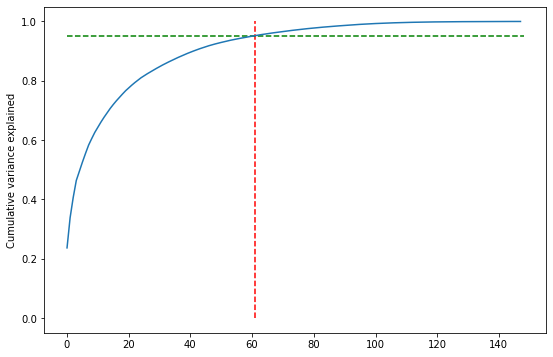

In [50]:
# Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[9,6])
plt.vlines(x=61, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=148, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

> 61 Principle components are able to explain 95% variances.

- PCA with 61 components

In [51]:
from sklearn.decomposition import IncrementalPCA
pca_95 = IncrementalPCA(n_components=61)
X_train_pca95 = pca_95.fit_transform(X_train)
X_train_pca95.shape

(20967, 61)

In [52]:
# Correlation matrix
corrmat = pd.DataFrame(X_train_pca95).corr()
corrmat.shape

(61, 61)

In [53]:
# Finding the Top few Correlation variables
corr_df = corrmat.where(np.triu(
    np.ones(corrmat.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset=['Correlation'], inplace=True)
corr_df.sort_values(by='Correlation', ascending=False).head(10)

,Var1,Var2,Correlation
3591,58,53,0.014379
3469,56,53,0.011420
3594,58,56,0.009367
3652,59,53,0.008181
3655,59,56,0.005088
3595,58,57,0.004491
3347,54,53,0.003915
3593,58,55,0.003868
3653,59,54,0.003359
3279,53,46,0.003229


> Highest Correlation between two variables are just `1.14 %`! 

### Logistic Model with PCA

- Applying logistic regression on the data on our Principal components

In [54]:
# Model building
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_pca95 = LogisticRegression(random_state=10, class_weight='balanced')
logm_pca95 = logreg_pca95.fit(X_train_pca95, y_train)

In [55]:
# Prediction on Test set
X_test_pca95 = pca_95.transform(X_test)
y_test_pred_pca95 = logm_pca95.predict_proba(X_test_pca95)

In [56]:
# Area under curve
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred_pca95[:,1]))

'0.8'

In [57]:
# Dataframe for test prediction the actual churn flag and the predicted probabilities
y_test_pred_pca95_df = pd.DataFrame({'test_churn':y_test.values, 'test_churn_prob':y_test_pred_pca95[:,1].round()})
y_test_pred_pca95_df.head()

,test_churn,test_churn_prob
0,0,1.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,1.0


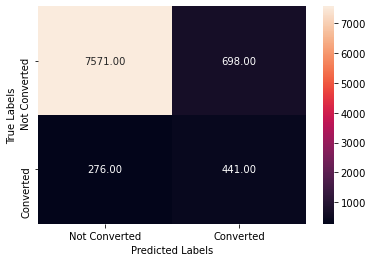

In [58]:
# Function to draw the Confusion Matrix 
def draw_cm(actual, predicted):
    confusion = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(confusion, annot=True, fmt=".2f", xticklabels=[
                "Not Converted", "Converted"], yticklabels=["Not Converted", "Converted"])
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.show()

# Plot Confusion matrix
draw_cm(y_test_pred_pca95_df.test_churn, y_test_pred_pca95_df.test_churn_prob)

In [59]:
# Generating the classification report
print(metrics.classification_report(y_test_pred_pca95_df.test_churn, y_test_pred_pca95_df.test_churn_prob))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8269
           1       0.39      0.62      0.48       717

    accuracy                           0.89      8986
   macro avg       0.68      0.77      0.71      8986
weighted avg       0.92      0.89      0.90      8986



> Sensitivity/ recall stands at 62%, which needs to be improved to fullfil our business goal

- Making it a little more unsupervised 
 - Select components which explains more than 90% variance

In [60]:
pca_90 = PCA(0.90)
X_train_pca90 = pca_90.fit_transform(X_train)
X_train_pca90.shape

(20967, 42)

- Logistic regression on 42 Principle component

In [61]:
# Model building
logreg_pca90 = LogisticRegression(random_state=10, class_weight='balanced')
logm_pca90 = logreg_pca90.fit(X_train_pca90, y_train)

In [62]:
# Prediction on Test set
X_test_pca90 = pca_90.transform(X_test)
y_test_pred_pca90 = logm_pca90.predict_proba(X_test_pca90)

In [63]:
# Area under curve
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred_pca90[:,1]))

'0.79'

In [64]:
# Dataframe for test prediction the actual churn flag and the predicted probabilities
y_test_pred_pca90_df = pd.DataFrame({'test_churn':y_test.values, 'test_churn_prob':y_test_pred_pca90[:,1].round()})
y_test_pred_pca90_df.head()

,test_churn,test_churn_prob
0,0,1.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,1.0


- Model evaluation

In [65]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_pca90_df.test_churn, y_test_pred_pca90_df.test_churn_prob)
confusion

array([[7210, 1059],
       [ 248,  469]], dtype=int64)

In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Let's see the sensitivity of our PCA logistic regression model
print('sensitivity:{}'.format(round(TP / float(TP+FN), 2)))

# Let us calculate specificity
print('specificity:{}'.format(round(TN / float(TN+FP), 2)))

# positive predictive value
print('positive predictive value:{}'.format(round(TP / float(TP+FP), 2)))

# negative predictive value
print('negative predictive value:{}'.format(round(TN / float(TN + FN), 2)))

# Let's check the overall accuracy.
print('Accuracy:{}'.format(round(metrics.accuracy_score(
    y_test_pred_pca90_df.test_churn, y_test_pred_pca90_df.test_churn_prob), 2)))

sensitivity:0.65
specificity:0.87
positive predictive value:0.31
negative predictive value:0.97
Accuracy:0.85


> Logistic regression with PCA we have achieved 62-65% sensitivity at 85-87% accuracy. Sensitivity for both the Logistic PCA model stood at law but PCA really helps to reduce dimensions. Now lets use PCA components which explains more than 95% to built Decision Tree Model.

### Decision Tree with PCA

In [68]:
# PCA Train and Test set

X_train_dt = X_train_pca95.copy()
print(X_train_dt.shape)

X_test_dt = X_test_pca95.copy()
print(X_test_dt.shape)

(20967, 61)
(8986, 61)


- Hyperparameter tuning

In [78]:
# Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

# Classifier initialization
dt_pca = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [72]:
# Create the parameter grid 
params = {
    'max_depth': [2, 3, 5, 10, 20, 30, 40, 50],
    'min_samples_leaf': [2, 3, 4, 5, 10],
    'criterion': ["gini", "entropy"] 
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [73]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_pca, param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1,
                           scoring=scorers, refit='recall_score')

In [74]:
%%time
grid_search.fit(X_train_dt, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.8min finished


Wall time: 2min 51s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 3, 4, 5, 10]},
             refit='recall_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)},
             verbose=1)

In [75]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_leaf=2, random_state=42)

In [76]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train_dt)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train_dt)))
    print("-"*40)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test_dt)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test_dt)))

- Evaluating best parameter model

In [79]:
evaluate_model(dt_best)

Train Accuracy : 0.714885295941241
Train Confusion Matrix:
[[13661  5590]
 [  388  1328]]
----------------------------------------
Test Accuracy : 0.2687513910527487
Test Confusion Matrix:
[[1763 6506]
 [  65  652]]


In [80]:
# Train set
# Generating the classification report
print(metrics.classification_report(y_train, dt_best.predict(X_train_dt)))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     19251
           1       0.19      0.77      0.31      1716

    accuracy                           0.71     20967
   macro avg       0.58      0.74      0.56     20967
weighted avg       0.91      0.71      0.78     20967



In [81]:
# Test Set
# Generating the classification report
print(metrics.classification_report(y_test, dt_best.predict(X_test_dt)))

              precision    recall  f1-score   support

           0       0.96      0.21      0.35      8269
           1       0.09      0.91      0.17       717

    accuracy                           0.27      8986
   macro avg       0.53      0.56      0.26      8986
weighted avg       0.89      0.27      0.33      8986



> Clasification report on Test dataset suggest that here we are able to achive the best possible recall score but, accuracy is very low on test set which is the case of underfitting. Lets consider Random forest to achieve sensitivity as well as accuracy if possible.

### Random Forest with PCA

In [82]:
# PCA Train and Test set

X_train_rf = X_train_pca95.copy()
print(X_train_rf.shape)

X_test_rf = X_test_pca95.copy()
print(X_test_rf.shape)

(20967, 61)
(8986, 61)


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

In [84]:
# Create the parameter grid
params = {
    'max_depth': [2, 3, 4, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50, 60],
    'max_features': [2, 3, 4, 5],
    'n_estimators': [10, 30, 50, 100]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [85]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_pca, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, 
                          scoring=scorers, refit='recall_score')

In [86]:
%%time
grid_search.fit(X_train_rf, y_train)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 454 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1254 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 16.8min finished


Wall time: 16min 49s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 50, 60],
                         'n_estimators': [10, 30, 50, 100]},
             refit='recall_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)},
             verbose=1)

In [87]:
# Best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=5,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

In [88]:
evaluate_model(rf_best)

Train Accuracy : 0.8071254829017027
Train Confusion Matrix:
[[15623  3628]
 [  416  1300]]
----------------------------------------
Test Accuracy : 0.5908079234364567
Test Confusion Matrix:
[[4799 3470]
 [ 207  510]]


In [89]:
# Train Set
# Generating the classification report
print(metrics.classification_report(y_train, dt_best.predict(X_train_rf)))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     19251
           1       0.19      0.77      0.31      1716

    accuracy                           0.71     20967
   macro avg       0.58      0.74      0.56     20967
weighted avg       0.91      0.71      0.78     20967



In [90]:
# Testing set
# Generating the classification report
print(metrics.classification_report(y_test, rf_best.predict(X_test_rf)))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72      8269
           1       0.13      0.71      0.22       717

    accuracy                           0.59      8986
   macro avg       0.54      0.65      0.47      8986
weighted avg       0.89      0.59      0.68      8986



> Accuracy of train and test set are `71%` and `59%` respectively. Sensitivity of test dataset incresed compare to decision tree but accuracy decreased.

## Logistic Regression Model Building


  - First RFE will be run with 14 variables for feature selection 
  - Based on the results from RFE, manual elimination method will be adapted to check the p-Value, VIF and finally arrive at the metrics

### Feature Selection Using RFE

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=10, class_weight='balanced')

In [92]:
from sklearn.feature_selection import RFE

# running RFE with 14 variables as output
rfe = RFE(logreg, 14)             
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 117),
 ('arpu_7', True, 1),
 ('arpu_8', False, 22),
 ('onnet_mou_6', False, 116),
 ('onnet_mou_7', False, 3),
 ('onnet_mou_8', False, 41),
 ('offnet_mou_6', False, 13),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 96),
 ('roam_ic_mou_6', False, 45),
 ('roam_ic_mou_7', False, 82),
 ('roam_ic_mou_8', False, 126),
 ('roam_og_mou_6', False, 108),
 ('roam_og_mou_7', False, 119),
 ('roam_og_mou_8', False, 20),
 ('loc_og_t2t_mou_6', False, 97),
 ('loc_og_t2t_mou_7', False, 39),
 ('loc_og_t2t_mou_8', False, 85),
 ('loc_og_t2m_mou_6', False, 88),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 42),
 ('loc_og_t2f_mou_6', False, 51),
 ('loc_og_t2f_mou_7', False, 25),
 ('loc_og_t2f_mou_8', False, 27),
 ('loc_og_t2c_mou_6', False, 84),
 ('loc_og_t2c_mou_7', False, 101),
 ('loc_og_t2c_mou_8', False, 81),
 ('loc_og_mou_6', False, 89),
 ('loc_og_mou_7', False, 24),
 ('loc_og_mou_8', False, 40),
 ('std_og_t2t_mou_6', False, 14),
 ('std_og_t2t_mou_7', False, 4),
 

In [95]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['arpu_7', 'offnet_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7',
       'std_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_8'],
      dtype='object')

### Model Assesment

In [96]:
# Defining Functions

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics

# To get GLM model summary
def GLM_summary(col):
    X_train_sm = sm.add_constant(X_train[col])
    logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    res = logm.fit()
    return print(res.summary())

# Check for the VIF values of the feature variables.
def VIF_df(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(
        X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return print(vif)

- Model 1

In [97]:
GLM_summary(rfe_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20952
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3938.6
Date:                Mon, 31 Aug 2020   Deviance:                       7877.2
Time:                        23:18:32   Pearson chi2:                 4.78e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6799      0

In [98]:
VIF_df(rfe_col)

              Features    VIF
1         offnet_mou_7  41.41
3     std_og_t2m_mou_7  23.84
2     loc_og_t2m_mou_7  12.67
5       total_og_mou_8  11.15
4         std_og_mou_8   8.25
0               arpu_7   6.35
6         loc_ic_mou_7   5.14
7       total_ic_mou_8   4.83
8     total_rech_num_8   3.91
9   last_day_rch_amt_8   2.12
10   total_rech_data_8   1.80
11        monthly_2g_7   1.67
12        monthly_2g_8   1.65
13        monthly_3g_8   1.27


> The variable `offnet_mou_7` has highest VIF so will consider to drop it first.

In [99]:
rfe_col = rfe_col.drop('offnet_mou_7')
rfe_col

Index(['arpu_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_8'],
      dtype='object')

- Model 2

In [100]:
GLM_summary(rfe_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20953
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3959.0
Date:                Mon, 31 Aug 2020   Deviance:                       7918.0
Time:                        23:18:33   Pearson chi2:                 4.84e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9893      0

In [101]:
VIF_df(rfe_col)

              Features    VIF
4       total_og_mou_8  11.01
3         std_og_mou_8   8.15
0               arpu_7   6.20
5         loc_ic_mou_7   5.11
6       total_ic_mou_8   4.83
7     total_rech_num_8   3.90
1     loc_og_t2m_mou_7   3.37
8   last_day_rch_amt_8   2.12
2     std_og_t2m_mou_7   2.05
9    total_rech_data_8   1.79
10        monthly_2g_7   1.67
11        monthly_2g_8   1.65
12        monthly_3g_8   1.27


In [102]:
# Drop feature having high VIF
rfe_col = rfe_col.drop('total_og_mou_8')
rfe_col

Index(['arpu_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_8',
       'loc_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_8'],
      dtype='object')

- Model 3

In [103]:
GLM_summary(rfe_col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20954
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4053.9
Date:                Mon, 31 Aug 2020   Deviance:                       8107.8
Time:                        23:18:33   Pearson chi2:                 1.22e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6704      0

In [104]:
VIF_df(rfe_col)

              Features   VIF
0               arpu_7  6.19
4         loc_ic_mou_7  5.09
5       total_ic_mou_8  4.61
6     total_rech_num_8  3.75
3         std_og_mou_8  2.60
1     loc_og_t2m_mou_7  2.41
7   last_day_rch_amt_8  2.08
2     std_og_t2m_mou_7  2.05
8    total_rech_data_8  1.78
9         monthly_2g_7  1.67
10        monthly_2g_8  1.65
11        monthly_3g_8  1.27


> `arpu_7` has VIF more than 5, but from churning perspective it seems important to keep. Also it is less that 10 VIF so we will go ahead with this features.

- Final Model

In [105]:
rfe_col

Index(['arpu_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_8',
       'loc_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_8'],
      dtype='object')

In [106]:
# GLM Model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res_final = logm.fit()

In [107]:
# Getting the predicted values on the train set
y_train_pred = res_final.predict(X_train_sm)

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00038558, 0.10735159, 0.00314304, 0.21357505, 0.01145376,
       0.23195445, 0.03621547, 0.03292965, 0.20348478, 0.09536192])

### Model Evaluation

- Evaluating model initialy at cut-off probability 0.5

In [108]:
# Dataframe with the actual churn flag and the predicted probabilities
y_train_pred_df = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred})
y_train_pred_df.head()

,churn,churn_prob
0,0,0.000386
1,0,0.107352
2,0,0.003143
3,0,0.213575
4,0,0.011454


In [109]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_df['predicted'] = y_train_pred_df.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_df.head()

,churn,churn_prob,predicted
0,0,0.000386,0
1,0,0.107352,0
2,0,0.003143,0
3,0,0.213575,0
4,0,0.011454,0


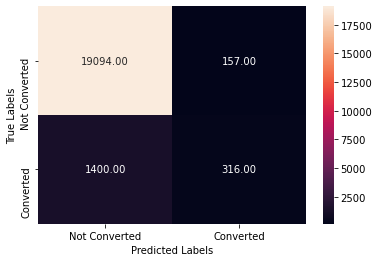

In [110]:
# Plot Confusion matrix
draw_cm(y_train_pred_df.churn, y_train_pred_df.predicted)

In [111]:
# Generating the classification report
print(metrics.classification_report(y_train_pred_df.churn, y_train_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19251
           1       0.67      0.18      0.29      1716

    accuracy                           0.93     20967
   macro avg       0.80      0.59      0.62     20967
weighted avg       0.91      0.93      0.91     20967



>- Accuracy of 93 % is achieved
>- Sensitiviy / Recall is of 18 % ( Predicted as churn, which is significant lower)
>- Must find the best tradeoff between sensitivity, specificity and accuracy.

### Finding Optimal Cutoff

- Plotting the ROC Curve

In [112]:
# To draw ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.churn, y_train_pred_df.churn_prob, drop_intermediate = False )

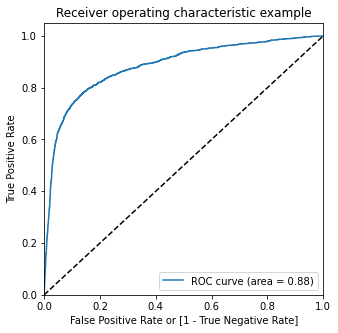

In [114]:
draw_roc(y_train_pred_df.churn, y_train_pred_df.churn_prob)

In [115]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_df[i] = y_train_pred_df.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000386,0,1,0,0,0,0,0,0,0,0,0
1,0,0.107352,0,1,1,0,0,0,0,0,0,0,0
2,0,0.003143,0,1,0,0,0,0,0,0,0,0,0
3,0,0.213575,0,1,1,1,0,0,0,0,0,0,0
4,0,0.011454,0,1,0,0,0,0,0,0,0,0,0


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_df.churn, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081843  1.000000  0.000000
0.1   0.1  0.819764  0.810023  0.820633
0.2   0.2  0.899270  0.710373  0.916108
0.3   0.3  0.926551  0.600816  0.955587
0.4   0.4  0.931225  0.417249  0.977040
0.5   0.5  0.925740  0.184149  0.991845
0.6   0.6  0.922116  0.078671  0.997299
0.7   0.7  0.919874  0.030886  0.999117
0.8   0.8  0.919159  0.013403  0.999896
0.9   0.9  0.918586  0.005245  1.000000


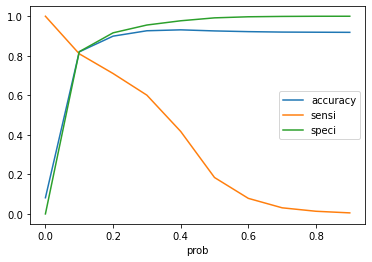

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

> From the above plot we can observe that Sensitivity, Specificity, Accuracy converge at around `0.1`, hence this could be taken as optimal cut off

- Predicting again / Rebuilding at 0.1 cutoff
   - Rechecking Metrics and Model Evaluation using the probability cut off `0.1`
   - Based on Accuracy, Sensitivity / Recall, Specificity, Precision

In [118]:
# Cutoff 0.1
y_train_pred_df['pred_0.1'] = y_train_pred_df.churn_prob.map(
    lambda x: 1 if x > 0.1 else 0)
y_train_pred_df.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,pred_0.1
0,0,0.000386,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.107352,0,1,1,0,0,0,0,0,0,0,0,1
2,0,0.003143,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.213575,0,1,1,1,0,0,0,0,0,0,0,1
4,0,0.011454,0,1,0,0,0,0,0,0,0,0,0,0


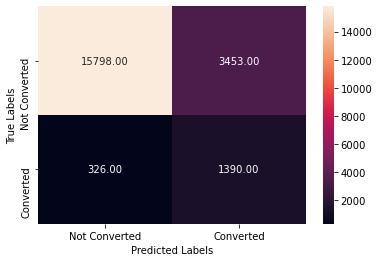

In [119]:
# Plot Confusion matrix
draw_cm(y_train_pred_df.churn, y_train_pred_df['pred_0.1'])

In [120]:
# Generating the classification report
print(metrics.classification_report(y_train_pred_df.churn, y_train_pred_df['pred_0.1']))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     19251
           1       0.29      0.81      0.42      1716

    accuracy                           0.82     20967
   macro avg       0.63      0.82      0.66     20967
weighted avg       0.92      0.82      0.85     20967



>- Accuracy is changed from 93 % to 82%.
>- But, sensitiviy / Recall is improved from 18 % to 81 % which is a good sign for the goal
>- Specificity is fallen from 99 % to 82 %, is actually on the track because we are more interested into predict correct churn.
>- Precision (True Positives) is fallen from 67 % to 29 % , as there is a increase of both TP, FP
>- Precision (True Negatives) is increased from 93 % to 98 %, as there is a decrease of both TN, FN 

### Model Validation

- Prediction on the Test data set

In [121]:
# Rechecking the Test data set and shape
print("Shape -",X_test.shape)
X_test.head()

Shape - (8986, 148)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,ever_rech_data,av_total_rech_amt_67
18546,409.351,-282.788,324.030,163.01,187.31,49.38,799.23,460.41,354.94,0.00,0.00,0.00,0.00,0.00,0.00,117.13,183.94,49.38,682.56,430.48,340.66,8.48,9.69,0.00,9.09,4.90,0.00,808.18,624.13,390.04,45.88,3.36,0.00,97.08,4.26,8.26,2.0,11.06,6.01,144.96,18.69,14.28,0.0,0.0,0.0,9.09,4.90,0.00,0.0,962.24,647.73,404.33,17.53,5.41,0.46,33.14,7.46,6.18,3.88,0.00,0.00,54.56,12.88,6.64,0.85,0.00,0.00,7.08,0.00,0.00,0.00,0.0,0.0,7.93,0.00,0.00,62.61,12.88,6.64,0.0,0.00,0.0,0.01,0.0,0.0,1,2,0,505,1010,0,505,505,0,505,505,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,254,0.00,0.0,0.00,0,757.5
68409,26.428,92.706,44.171,0.60,2.23,0.00,12.64,25.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,2.23,0.00,0.73,25.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.33,28.18,0.00,0.00,0.00,0.00,11.91,0.00,0.00,0.0,0.00,0.00,11.91,0.00,0.00,0.0,0.0,0.0,1.14,0.28,0.16,0.0,14.39,28.46,0.16,5.49,5.94,4.59,23.33,35.04,60.46,0.00,0.00,0.00,28.83,40.99,65.06,0.00,0.00,0.00,0.00,0.76,0.00,0.00,0.0,0.0,0.00,0.76,0.00,28.83,41.98,65.06,0.0,0.21,0.0,0.00,0.0,0.0,5,8,6,30,105,50,30,30,25,30,25,0,0.0,6.0,4.0,0.0,25.0,25.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,150.0,100.0,0.00,0.00,2.16,0.00,318.57,209.65,0.00,0.22,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,6,4,0,0,0,0,0,0,0.0,1.0,1.0,353,27.17,0.0,106.57,1,517.5
10534,195.486,522.442,427.695,42.58,93.08,83.68,257.54,329.91,259.11,0.00,102.58,0.00,0.00,155.66,0.00,42.06,49.93,79.68,247.76,216.73,257.38,0.00,0.00,1.16,0.00,0.66,0.00,289.83,266.66,338.23,0.51,0.00,3.99,1.83,0.00,0.56,0.0,0.00,0.00,2.34,0.00,4.56,0.0,0.0,0.0,7.95,0.66,0.00,0.0,300.13,267.33,342.79,75.68,91.01,101.18,338.06,243.81,278.36,13.34,9.54,8.13,427.09,344.38,387.68,3.26,2.36,3.63,2.88,0.00,1.08,1.61,0.0,0.0,7.76,2.36,4.71,434.86,346.74,392.39

In [122]:
# Scaling of the Test data set using the Standard Scaler 
X_test_logm = X_test.copy()
X_test_logm[X_test_logm.columns] = scaler.transform(X_test_logm[X_test_logm.columns])
X_test_logm.shape

(8986, 148)

In [123]:
X_test_logm = X_test_logm[rfe_col]
X_test_logm.head()

,arpu_7,loc_og_t2m_mou_7,std_og_t2m_mou_7,std_og_mou_8,loc_ic_mou_7,total_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,monthly_2g_7,monthly_2g_8,monthly_3g_8
18546,0.306176,0.387122,0.002014,0.005135,0.008541,0.003847,0.000000,0.000000,0.000000,0.0,0.0,0.0000
68409,0.420353,0.023327,0.000000,0.000000,0.027182,0.037694,0.133333,0.000000,0.307692,0.0,0.0,0.0000
10534,0.551023,0.194901,0.000000,0.001640,0.228369,0.227341,0.133333,0.446018,0.076923,0.0,0.0,0.0625
10999,0.748809,0.114128,0.488080,0.587246,0.168541,0.220110,0.444444,0.230088,0.076923,0.4,0.2,0.0000
42291,0.599918,0.027770,0.073447,0.000000,0.041399,0.000000,0.111111,0.000000,0.000000,0.0,0.0,0.0000


In [124]:
X_test_logm_sm = sm.add_constant(X_test_logm)

In [125]:
# Making predictions on the test set
y_test_pred = res_final.predict(X_test_logm_sm)
y_test_pred[:10]

18546    0.215790
68409    0.079077
10534    0.002979
10999    0.000422
42291    0.489081
30920    0.025007
48587    0.000070
89200    0.101708
33509    0.000008
52188    0.011702
dtype: float64

In [126]:
# Dataframe for test prediction the actual churn flag and the predicted probabilities
y_test_pred_df = pd.DataFrame({'test_churn':y_test.values, 'test_churn_prob':y_test_pred})
y_test_pred_df.head()

,test_churn,test_churn_prob
18546,0,0.215790
68409,0,0.079077
10534,0,0.002979
10999,0,0.000422
42291,1,0.489081


In [127]:
# Predicting the model probability values based on the cut off "0.1"
y_test_pred_df['test_predicted'] = y_test_pred_df.test_churn_prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_pred_df.head()

,test_churn,test_churn_prob,test_predicted
18546,0,0.215790,1
68409,0,0.079077,0
10534,0,0.002979,0
10999,0,0.000422,0
42291,1,0.489081,1


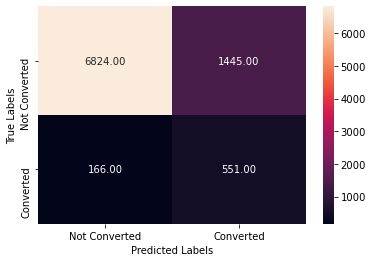

In [128]:
# Plot Confusion matrix
draw_cm(y_test_pred_df.test_churn, y_test_pred_df.test_predicted)

In [129]:
# Generating the classification report
print(metrics.classification_report(y_test_pred_df.test_churn, y_test_pred_df.test_predicted))

              precision    recall  f1-score   support

           0       0.98      0.83      0.89      8269
           1       0.28      0.77      0.41       717

    accuracy                           0.82      8986
   macro avg       0.63      0.80      0.65      8986
weighted avg       0.92      0.82      0.86      8986



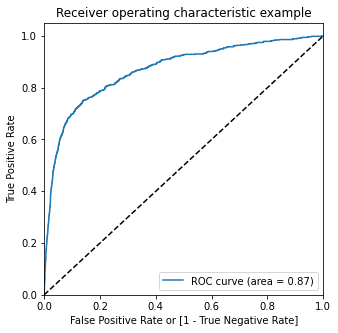

In [130]:
# Drawing the ROC curve with the Test data
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_df.test_churn, y_test_pred_df.test_churn_prob, drop_intermediate = False )
draw_roc(y_test_pred_df.test_churn, y_test_pred_df.test_churn_prob)

>- **From the above classification report generated, and in comparison with the metrics generated by the train data set with probability cut off of `0.1`, we can observe the following**
    - Accuracy is 82 % - which is the almost the same when compared to the Accuracy of 82 % in the Train data set 
    - Sensitiviy / Recall is 77 %, which is slightly lower and nearly the same of 81 % in the Train data set 
    - Specificity is 83%, which is same as the 82 % in the Train data set
    - Precision (True Positives) is 74 % , which is slighlty higher then the 81 % in the Train data set
    - ROC Curve value is also good at 0.87 , which is almost same with 0.88 generated from the Train data set and is being close to 1. 
 
>**With this validation we can say that Model is performing, predicting well and not deviating from the Metrics results generated with the Training data set**

In [131]:
res_final.params

const                 -1.670411
arpu_7                 3.266771
loc_og_t2m_mou_7      -1.522752
std_og_t2m_mou_7       0.316374
std_og_mou_8          -1.067474
loc_ic_mou_7           3.464955
total_ic_mou_8       -14.407367
total_rech_num_8      -4.117189
last_day_rch_amt_8    -3.689197
total_rech_data_8     -3.654187
monthly_2g_7          -2.958784
monthly_2g_8          -5.844764
monthly_3g_8         -10.957342
dtype: float64

> **Churning Model Interpretaion**
 - In general it seems that month of July and August, 2 months data prior to churning phase contributing significantly to decide chrning rate. So company should always more focus on last 2 months of data.
 - If customers have subscribed to monthly 2g or 3g then most likely they will stay with the company atleast until service is running.
 - If customer has recharge many time in last months and receiving more incoming call then probability to leave network is very less.

---

                                        END

---